<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion9_g44_12sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadistica aplicada
sesion9 - 12 sept

Yessica Abigail Santiago Hernandez 1990002

Gpo 44

In [1]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#librerias especializadas
from lifelines import CoxPHFitter, KaplanMeierFitter, ExponentialFitter, WeibullFitter,LogNormalFitter
import seaborn as sns

In [18]:
#datos
df_cancer = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')

In [19]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:
inst: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses.


In [20]:
#estadisticas descriptivas
df_cancer['status'] = df_cancer['status']-1
df_cancer['sex'] = df_cancer['sex']-1
##status 1= muerto 0= censurado
##sex 1= femenino 0= masculino


In [21]:
##eliminar cariable inst
df_cancer = df_cancer.drop('inst',axis = 1)

In [23]:
##verificar que sean numericas para poder utilizarlas
df_cancer.dtypes
##int-->enteros float-->decimales

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [26]:
##verificar cuantos missing values hay (valores perdidos)
df_cancer.isnull().sum()


time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [28]:
#eliminar dato/ imputar datos

In [27]:
#estadistica descriptiva
df_cancer.describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,305.232456,0.723684,62.447368,0.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,5.000000,0.000000,39.000000,0.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,166.750000,0.000000,56.000000,0.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,255.500000,1.000000,63.000000,0.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,396.500000,1.000000,69.000000,1.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,1022.000000,1.000000,82.000000,1.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


El 72% de los individuos fallecieron, el 39% de los individuos es mujer, la edad promedio es de 62.44, el individuo mas joven tiene 39 y el mayor edad tiene 82.

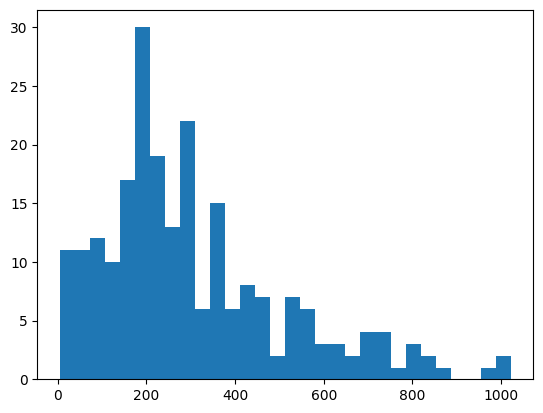

In [32]:
#distirbucion de T
plt.hist(df_cancer['time'],bins = 30)
plt.show()

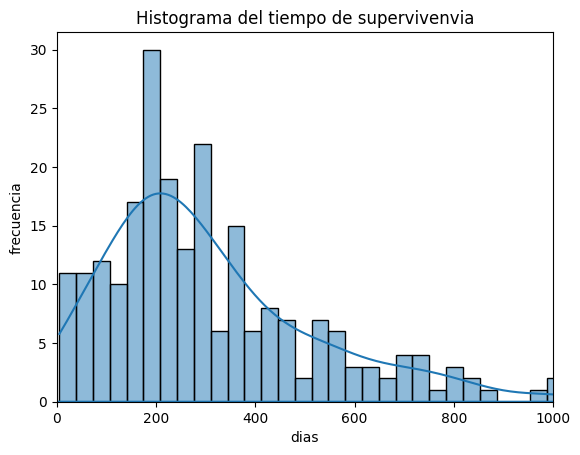

In [40]:
#histograma
sns.histplot(df_cancer['time'],bins=30, kde = True)
#añadir curva de distribucion
sns.kdeplot(df_cancer['time'])
plt.xlim(0,1000)
plt.title('Histograma del tiempo de supervivenvia')
plt.xlabel('dias')
plt.ylabel('frecuencia');

In [ ]:
#estimacion del modelo